# Averages in Cricket
## Will really make a batsman reliable but,
## will they really make a batsman consistent?
### Let's take one of the most famous and celebrated batsmen of Indian cricket who bags many records -
__ROHIT SHARMA__


In [485]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
print("Required Libraries imported successfully")

Required Libraries imported successfully


In [35]:
#Let's scrape data of rohit sharma's ODI matches from "Howstat" website
url = "http://howstat.com/cricket/Statistics/Players/PlayerProgressBat_ODI.asp?PlayerId=3474"
page=requests.get(url).text
bs= BeautifulSoup(page,'lxml')
#df = pd.read_html(bs.table)
table = bs.find('table',{'class':'TableLined'})
rohit_df=pd.read_html(str(table))[0]
rohit_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Progressive,Progressive,Progressive
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Date,Versus,Ground,D/N*,How Dismissed,Runs,B/F,S/R,NaN,Aggr,Avg,S/R
3,1,23/06/2007,Ireland,Civil Service Cricket Club,NaN,did not bat,-,-,-,NaN,0,NaN,-
4,2,26/06/2007,South Africa,Civil Service Cricket Club,NaN,b J H Kallis,8,9,88.89,NaN,8,8.00,88.89


In [36]:
rohit_df=rohit_df[2:227].reset_index()
rohit_df.drop(columns=['index',0],inplace=True)
rohit_df.head()

,1,2,3,4,5,6,7,8,9,10,11,12
0,Date,Versus,Ground,D/N*,How Dismissed,Runs,B/F,S/R,NaN,Aggr,Avg,S/R
1,23/06/2007,Ireland,Civil Service Cricket Club,NaN,did not bat,-,-,-,NaN,0,NaN,-
2,26/06/2007,South Africa,Civil Service Cricket Club,NaN,b J H Kallis,8,9,88.89,NaN,8,8.00,88.89
3,05/10/2007,Australia,Rajiv Gandhi International Stadium,NaN,c B Lee b J R Hopes,1,4,25.00,NaN,9,4.50,69.23
4,18/11/2007,Pakistan,Sawai Mansingh Stadium,&check;,c Yasir Hameed b Shoaib Malik,52,61,85.25,NaN,61,20.33,82.43


In [37]:
rohit_df.columns=rohit_df.iloc[0].to_list()
rohit_df.drop(0,inplace=True)
rohit_df.head()

,Date,Versus,Ground,D/N*,How Dismissed,Runs,B/F,S/R,NaN,Aggr,Avg,S/R
1,23/06/2007,Ireland,Civil Service Cricket Club,NaN,did not bat,-,-,-,NaN,0,NaN,-
2,26/06/2007,South Africa,Civil Service Cricket Club,NaN,b J H Kallis,8,9,88.89,NaN,8,8.00,88.89
3,05/10/2007,Australia,Rajiv Gandhi International Stadium,NaN,c B Lee b J R Hopes,1,4,25.00,NaN,9,4.50,69.23
4,18/11/2007,Pakistan,Sawai Mansingh Stadium,&check;,c Yasir Hameed b Shoaib Malik,52,61,85.25,NaN,61,20.33,82.43
5,03/02/2008,Australia,Brisbane Cricket Ground,&check;,c †A C Gilchrist b B Lee,29,43,67.44,NaN,90,22.50,76.92


### Now our dataframe looks in order for EDA.Let's dive

In [38]:
rohit_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 224 entries, 1 to 224
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           224 non-null    object
 1   Versus         224 non-null    object
 2   Ground         224 non-null    object
 3   D/N*           152 non-null    object
 4   How Dismissed  224 non-null    object
 5   Runs           224 non-null    object
 6   B/F            224 non-null    object
 7   S/R            224 non-null    object
 8   nan            0 non-null      object
 9   Aggr           224 non-null    object
 10  Avg            223 non-null    object
 11  S/R            224 non-null    object
dtypes: object(12)
memory usage: 22.8+ KB


### Let's drop a  noise feature nan.

In [39]:
rohit_df=rohit_df.loc[:,rohit_df.columns.notnull()]
rohit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 224 entries, 1 to 224
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           224 non-null    object
 1   Versus         224 non-null    object
 2   Ground         224 non-null    object
 3   D/N*           152 non-null    object
 4   How Dismissed  224 non-null    object
 5   Runs           224 non-null    object
 6   B/F            224 non-null    object
 7   S/R            224 non-null    object
 8   Aggr           224 non-null    object
 9   Avg            223 non-null    object
 10  S/R            224 non-null    object
dtypes: object(11)
memory usage: 21.0+ KB


In [40]:
rohit_df['D/N*'].value_counts()

&check;    152
Name: D/N*, dtype: int64

- D/N* means Day and night and it is more like a radio button. So, let's transform into boolean

In [41]:
rohit_df['D/N*']=rohit_df['D/N*'].replace("&check;",1)
rohit_df['D/N*']=rohit_df['D/N*'].replace(np.nan,0)
rohit_df['D/N*'].value_counts()

1.0    152
0.0     72
Name: D/N*, dtype: int64

In [42]:
rohit_df.dropna(inplace=True)
rohit_df['Date']=pd.to_datetime(rohit_df['Date'])
rohit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223 entries, 2 to 224
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           223 non-null    datetime64[ns]
 1   Versus         223 non-null    object        
 2   Ground         223 non-null    object        
 3   D/N*           223 non-null    float64       
 4   How Dismissed  223 non-null    object        
 5   Runs           223 non-null    object        
 6   B/F            223 non-null    object        
 7   S/R            223 non-null    object        
 8   Aggr           223 non-null    object        
 9   Avg            223 non-null    object        
 10  S/R            223 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 20.9+ KB


In [43]:
rohit_df['Year']= pd.DatetimeIndex(rohit_df.Date).year
rohit_df


,Date,Versus,Ground,D/N*,How Dismissed,Runs,B/F,S/R,Aggr,Avg,S/R,Year
2,2007-06-26,South Africa,Civil Service Cricket Club,0.0,b J H Kallis,8,9,88.89,8,8.00,88.89,2007
3,2007-05-10,Australia,Rajiv Gandhi International Stadium,0.0,c B Lee b J R Hopes,1,4,25.00,9,4.50,69.23,2007
4,2007-11-18,Pakistan,Sawai Mansingh Stadium,1.0,c Yasir Hameed b Shoaib Malik,52,61,85.25,61,20.33,82.43,2007
5,2008-03-02,Australia,Brisbane Cricket Ground,1.0,c †A C Gilchrist b B Lee,29,43,67.44,90,22.50,76.92,2008
6,2008-04-02,Sri Lanka,Brisbane Cricket Ground,1.0,c †K C Sangakkara b M Muralitharan,0,2,0.00,90,18.00,75.63,2008
...,...,...,...,...,...,...,...,...,...,...,...,...
220,2019-12-18,West Indies,Dr YS Rajasekhara Reddy Cricket Stadium,1.0,c †S D Hope b S S Cottrell,159,138,115.22,8881,49.07,88.81,2019
221,2019-12-22,West Indies,Barabati Stadium,1.0,c †S D Hope b J O Holder,63,63,100.00,8944,49.14,88.88,2019
222,2020-01-14,Australia,Wankhede Stadium,1.0,c D A Warner b M A Starc,10,15,66.67,8954,48.93,88.85,2020
223,2020-01-17,Australia,Saurashtra Cricket Association Stadium,1.0,lbw b A Zampa,42,44,95.45,8996,48.89,88.88,2020


In [44]:
rohit_df["Runs"].value_counts()

0       13
4       11
15       7
1        7
11       7
        ..
264      1
147      1
124      1
137*     1
9*       1
Name: Runs, Length: 113, dtype: int64

In [45]:
rohit_df['not_out'] = rohit_df['Runs'].apply(lambda x : 1 if (x.find("*")!=-1) else 0)
rohit_df["Runs"]=rohit_df["Runs"].str.replace("*","")
rohit_df["Runs"]=rohit_df["Runs"].str.replace("-","")

In [46]:
rohit_df['not_out'].value_counts()

0    191
1     32
Name: not_out, dtype: int64

In [47]:
rohit_df["Runs"]=pd.to_numeric(rohit_df["Runs"])
rohit_df["Runs"]

2        8.0
3        1.0
4       52.0
5       29.0
6        0.0
       ...  
220    159.0
221     63.0
222     10.0
223     42.0
224    119.0
Name: Runs, Length: 223, dtype: float64

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
fig.show()

In [50]:
rohit_df['Runs'].count() - rohit_df['not_out'].sum()

185

### Let us consider the data from 2013, because that's when Rohit started opening the innings and his average just sky rocketed.

In [486]:
from plotly.subplots import make_subplots
avgs=[];num_matches_list =[];years=[];total_matches=[] ;num_matches_half_list=[]; stds=[]
for year_time in rohit_df[rohit_df["Year"] > 2012]["Year"].unique():
    df_year = rohit_df[rohit_df.Year==year_time]
    df_year.sort_values(by='Date',ascending=True,inplace=True)
    df_year.reset_index(inplace=True,drop=True)
    df_year.index=df_year.index+1
    df_year.dropna(inplace=True)
    fig=go.Figure()
    fig.add_trace(go.Bar(x=df_year.index,y=df_year["Runs"],text=df_year['Runs'],textposition='auto',hoverinfo='text'))
    #fig = px.bar(df_year,y="Runs",text="Runs",title="Rohit ODI Runs in "+str(year_time),labels={'_index':"Match"},
     #            color_continuous_midpoint="Runs")
    avg_year = np.round((np.sum(df_year['Runs']))/(df_year['not_out'].count()-df_year['not_out'].sum()),2)
    fig.add_shape(type='line', x0=0, y0=avg_year,x1=df_year.shape[0]+2,y1=avg_year,line=dict(
        color="DarkOrange",
        width=2
    ))
    fig.update_layout(title='Performance of Rohit in '+str(year_time),
                        xaxis_title="Matches",
                        yaxis_title="Runs")
    fig.show()
    std=np.round(np.std(df_year['Runs']),2)
    print("\tAverage Runs - "+str(year_time)+" = "+str(avg_year))
    print("\tStandard deviation of runs scored = "+ str(std))
    num_matches = df_year[df_year.Runs >=avg_year]['Runs'].count()
    num_matches_half = df_year[df_year.Runs <=avg_year/2]['Runs'].count()
    print("\tOut of "+str(df_year.shape[0])+" played in "+str(year_time)+" Rohit crossed his year's average in "+str(num_matches))
    print("\tTherefore, the percentage of crossing his Year's average in "+str(year_time)+" = "+str(np.round(num_matches/df_year.shape[0],3)*100)+"%")
    print("\tOut of "+str(df_year.shape[0])+" played in "+str(year_time)+" Rohit scored less than half of his year's average in "+str(num_matches_half))
    print("\tTherefore, the percentage of scoring less than half of his Year's average in "+str(year_time)+" = "+str(np.round(num_matches_half/df_year.shape[0],3)*100)+"%")
    print("\tNo of not out's = "+str(df_year['not_out'].sum()))
    years.append(year_time)
    avgs.append(avg_year)
    stds.append(std)
    num_matches_list.append(num_matches)
    num_matches_half_list.append(num_matches_half)
    total_matches.append(df_year.shape[0])

	Average Runs - 2013 = 52.0
	Standard deviation of runs scored = 45.64
	Out of 27 played in 2013 Rohit crossed his year's average in 10
	Therefore, the percentage of crossing his Year's average in 2013 = 37.0%
	Out of 27 played in 2013 Rohit scored less than half of his year's average in 13
	Therefore, the percentage of scoring less than half of his Year's average in 2013 = 48.1%
	No of not out's = 4


	Average Runs - 2014 = 52.55
	Standard deviation of runs scored = 68.86
	Out of 12 played in 2014 Rohit crossed his year's average in 3
	Therefore, the percentage of crossing his Year's average in 2014 = 25.0%
	Out of 12 played in 2014 Rohit scored less than half of his year's average in 7
	Therefore, the percentage of scoring less than half of his Year's average in 2014 = 58.3%
	No of not out's = 1


	Average Runs - 2015 = 50.94
	Standard deviation of runs scored = 48.51
	Out of 17 played in 2015 Rohit crossed his year's average in 7
	Therefore, the percentage of crossing his Year's average in 2015 = 41.199999999999996%
	Out of 17 played in 2015 Rohit scored less than half of his year's average in 8
	Therefore, the percentage of scoring less than half of his Year's average in 2015 = 47.099999999999994%
	No of not out's = 1


	Average Runs - 2016 = 62.67
	Standard deviation of runs scored = 54.71
	Out of 10 played in 2016 Rohit crossed his year's average in 4
	Therefore, the percentage of crossing his Year's average in 2016 = 40.0%
	Out of 10 played in 2016 Rohit scored less than half of his year's average in 5
	Therefore, the percentage of scoring less than half of his Year's average in 2016 = 50.0%
	No of not out's = 1


	Average Runs - 2017 = 71.83
	Standard deviation of runs scored = 57.94
	Out of 21 played in 2017 Rohit crossed his year's average in 8
	Therefore, the percentage of crossing his Year's average in 2017 = 38.1%
	Out of 21 played in 2017 Rohit scored less than half of his year's average in 10
	Therefore, the percentage of scoring less than half of his Year's average in 2017 = 47.599999999999994%
	No of not out's = 3


	Average Runs - 2018 = 73.57
	Standard deviation of runs scored = 54.0
	Out of 19 played in 2018 Rohit crossed his year's average in 6
	Therefore, the percentage of crossing his Year's average in 2018 = 31.6%
	Out of 19 played in 2018 Rohit scored less than half of his year's average in 10
	Therefore, the percentage of scoring less than half of his Year's average in 2018 = 52.6%
	No of not out's = 5


	Average Runs - 2019 = 57.31
	Standard deviation of runs scored = 48.52
	Out of 27 played in 2019 Rohit crossed his year's average in 11
	Therefore, the percentage of crossing his Year's average in 2019 = 40.699999999999996%
	Out of 27 played in 2019 Rohit scored less than half of his year's average in 11
	Therefore, the percentage of scoring less than half of his Year's average in 2019 = 40.699999999999996%
	No of not out's = 1


	Average Runs - 2020 = 57.0
	Standard deviation of runs scored = 45.75
	Out of 3 played in 2020 Rohit crossed his year's average in 1
	Therefore, the percentage of crossing his Year's average in 2020 = 33.300000000000004%
	Out of 3 played in 2020 Rohit scored less than half of his year's average in 1
	Therefore, the percentage of scoring less than half of his Year's average in 2020 = 33.300000000000004%
	No of not out's = 0


In [165]:
rohit_stats_df = pd.DataFrame({'year':years,'average':avgs,'no_of_matches_crossed_avg':num_matches_list,'total_no_of_matches':total_matches,'less_than_half_avg':num_matches_half_list,'std_deviation':stds})
rohit_stats_df

,year,average,no_of_matches_crossed_avg,total_no_of_matches,less_than_half_avg,std_deviation
0,2013,52.00,10,27,13,45.64
1,2014,52.55,3,12,7,68.86
2,2015,50.94,7,17,8,48.51
3,2016,62.67,4,10,5,54.71
4,2017,71.83,8,21,10,57.94
5,2018,73.57,6,19,10,54.00
6,2019,57.31,11,27,11,48.52
7,2020,57.00,1,3,1,45.75


In [167]:
rohit_stats_df['%_of_matches_above_average'] = np.round(rohit_stats_df.no_of_matches_crossed_avg/rohit_stats_df.total_no_of_matches,4)*100
rohit_stats_df['%_of_matches_less_than_half_avg'] = np.round(rohit_stats_df.less_than_half_avg/rohit_stats_df.total_no_of_matches,4)*100
rohit_stats_df['range'] =np.round(rohit_stats_df['average']-rohit_stats_df['std_deviation'],2).astype(str)+" , "+np.round(rohit_stats_df['average']+rohit_stats_df['std_deviation'],2).astype(str)
rohit_stats_df

,year,average,no_of_matches_crossed_avg,total_no_of_matches,less_than_half_avg,std_deviation,%_of_matches_above_average,%_of_matches_less_than_half_avg,range
0,2013,52.00,10,27,13,45.64,37.04,48.15,"6.36 , 97.64"
1,2014,52.55,3,12,7,68.86,25.00,58.33,"-16.31 , 121.41"
2,2015,50.94,7,17,8,48.51,41.18,47.06,"2.43 , 99.45"
3,2016,62.67,4,10,5,54.71,40.00,50.00,"7.96 , 117.38"
4,2017,71.83,8,21,10,57.94,38.10,47.62,"13.89 , 129.77"
5,2018,73.57,6,19,10,54.00,31.58,52.63,"19.57 , 127.57"
6,2019,57.31,11,27,11,48.52,40.74,40.74,"8.79 , 105.83"
7,2020,57.00,1,3,1,45.75,33.33,33.33,"11.25 , 102.75"


###  Rohit Sharma scored less than his average more than 52% of the times in every year.
### Adding to it, He scored less than half of his average in more than 40% of the matches he played yearly.

## Yet, his average never went down to 50 in last 7 years??

- All these add up to one thing that __Rohit sharma__ is one of the __Greatest batsmen__ and if he goes on in a match, there is no stopping him.
- But, there is no guarantee on any match that he scores more than a fixed minimum score. Because it can vary.
- Don't take me wrong, averages like 55-60 in an year are just out the world stats for any international player. But, My only point being we can't be sure that rohit scores X minimum runs on any given day.

### Let's see in another way.  Observe standard deviations for each year. There are cases where std. deviation is more than average. Mathematically high std. means that data is scatter all over and not near to the average.

- To explain with an example. Let us consider 2016, where average is 56.40 and std.deviation 54.71. This means that rohit might score anything between 2 runs and 110 runs according to 2016 stats. Which is very variant due to his fluctuations in scoring runs.

### But, things changed in 2017 and 2018, where his average was more than 70 and standard deviation near 55. Making the first two years where lower bound crossing double digits. I mean 70-55 is 15 and 70+55 = 125 making a bound [15,125]. These 2 years show a remarkable increase average.

In [168]:
rohit_df[rohit_df.Year>2013]['Runs'].describe()

count    109.000000
mean      54.504587
std       54.850913
min        0.000000
25%       11.000000
50%       36.000000
75%       91.000000
max      264.000000
Name: Runs, dtype: float64

In [169]:
px.box(data_frame=rohit_df[rohit_df.Year>2013],y='Runs')

#### Box plot says that he scored more than 92 in 25% of his matches with is more than twice his average
#### And also shows Rohit scored 25% of matches less than 11. which is almost 5 times less than his average. 

In [471]:
ground_df=rohit_df[['Ground',"Runs"]].groupby("Ground").agg({"Runs":"mean","Ground":"count"})
ground_df.columns = ["avg_runs","num_of_matches"]
ground_df.sort_values(by='avg_runs',ascending=False,inplace=True)
ground_df.reset_index(inplace=True)
ground_df.style.background_gradient(cmap='Greens')

,Ground,avg_runs,num_of_matches
0,Brabourne Stadium,162.000000,1
1,Barsapara Cricket Stadium,152.000000,1
2,Trent Bridge,137.000000,1
3,Eden Gardens,135.500000,2
4,M Chinnaswamy Stadium,109.250000,4
5,Sawai Mansingh Stadium,96.500000,2
6,Queens Sports Club,93.000000,3
7,Green Park,82.250000,4
8,Punjab Cricket Association IS Bindra Stadium,82.000000,5
9,Bay Oval,74.500000,2


- Rohit has high scores in top 10 stadiums mentioned above. But, I feel __M Chidambaram Stadium__ is his best because he played 4 matches (almost an ODI series) and his average there is more than 100.
- He played most number of matches in __Rangiri Dambulla Intl. Stadium__ which is in Srilanka with an average of 17, which makes this stadium as a weak spot for him.

In [478]:
rohit_df[rohit_df['Ground']=="Rangiri Dambulla International Stadium"][['Versus','Runs']]

,Versus,Runs
18,Sri Lanka,19.0
19,Sri Lanka,0.0
31,Sri Lanka,25.0
45,Bangladesh,0.0
46,Pakistan,22.0
47,Sri Lanka,69.0
48,Sri Lanka,41.0
50,Sri Lanka,0.0
51,Sri Lanka,11.0
52,Sri Lanka,5.0


In [477]:
rohit_df[rohit_df['Ground']=="M Chinnaswamy Stadium"][['Versus','Runs']]


,Versus,Runs
49,New Zealand,44.0
89,Australia,209.0
165,Australia,65.0
222,Australia,119.0


In [117]:
url_virat = "http://howstat.com/cricket/Statistics/Players/PlayerProgressBat_ODI.asp?PlayerID=3600"
page=requests.get(url_virat).text
bs_vk = BeautifulSoup(page,'lxml')
table_vk = bs_vk.find('table',{'class':'TableLined'})
virat_df = pd.read_html(str(table_vk))[0]
virat_df=virat_df[2:255].reset_index()
virat_df.drop(columns=['index',0],inplace=True)
virat_df.columns = virat_df.iloc[0].to_list()
virat_df.drop(0,inplace=True)
virat_df.reset_index(inplace=True)
virat_df.drop(columns='index',inplace=True)
virat_df

,Date,Versus,Ground,D/N*,How Dismissed,Runs,B/F,S/R,NaN,Aggr,Avg,S/R
0,18/08/2008,Sri Lanka,Rangiri Dambulla International Stadium,NaN,lbw b K M D N Kulasekara,12,22,54.55,NaN,12,12.00,54.55
1,20/08/2008,Sri Lanka,Rangiri Dambulla International Stadium,NaN,c C K Kapugedera b T Thushara,37,67,55.22,NaN,49,24.50,55.06
2,24/08/2008,Sri Lanka,R Premadasa Stadium,&check;,run out,25,38,65.79,NaN,74,24.67,58.27
3,27/08/2008,Sri Lanka,R Premadasa Stadium,&check;,b T Thushara,54,66,81.82,NaN,128,32.00,66.32
4,29/08/2008,Sri Lanka,R Premadasa Stadium,&check;,lbw b K M D N Kulasekara,31,46,67.39,NaN,159,31.80,66.53
...,...,...,...,...,...,...,...,...,...,...,...,...
247,11/02/2020,New Zealand,Bay Oval,&check;,c K A Jamieson b H K Bennett,9,12,75.00,NaN,11867,59.34,93.25
248,27/11/2020,Australia,Sydney Cricket Ground,&check;,c A J Finch b J R Hazlewood,21,21,100.00,NaN,11888,59.14,93.26
249,29/11/2020,Australia,Sydney Cricket Ground,&check;,c M C Henriques b J R Hazlewood,89,87,102.30,NaN,11977,59.29,93.32
250,02/12/2020,Australia,Manuka Oval,&check;,c †A T Carey b J R Hazlewood,63,78,80.77,NaN,12040,59.31,93.25


In [118]:
pd.set_option('display.max_rows', 150)
virat_df['Runs'].value_counts()

0       13
-        9
2        8
31       6
9        6
8        5
3        5
1        5
16       4
7        4
18       4
11       4
37       4
22       4
66       4
12       4
107      4
77       3
45       3
82       3
28       3
15       3
54       3
21       3
4        3
26       2
25       2
59       2
123      2
117      2
78       2
75       2
55       2
10       2
43       2
23       2
38       2
89       2
35       2
68       2
91       2
20       2
106      2
46       2
5        2
100*     2
6        2
33*      2
116      1
102*     1
112*     1
48       1
115*     1
32*      1
33       1
67       1
105      1
49       1
139*     1
118      1
22*      1
2*       1
80       1
110*     1
29       1
154*     1
40       1
14       1
99       1
34       1
24       1
3*       1
53       1
77*      1
46*      1
122      1
128*     1
160*     1
63       1
81       1
81*      1
92       1
96*      1
112      1
94       1
114*     1
76*      1
115      1
1*       1
86*      1
127      1

In [119]:
virat_df['not_out'] = virat_df['Runs'].apply(lambda x : 1 if (x.find("*")!= -1) else 0)
virat_df

,Date,Versus,Ground,D/N*,How Dismissed,Runs,B/F,S/R,NaN,Aggr,Avg,S/R,not_out
0,18/08/2008,Sri Lanka,Rangiri Dambulla International Stadium,NaN,lbw b K M D N Kulasekara,12,22,54.55,NaN,12,12.00,54.55,0
1,20/08/2008,Sri Lanka,Rangiri Dambulla International Stadium,NaN,c C K Kapugedera b T Thushara,37,67,55.22,NaN,49,24.50,55.06,0
2,24/08/2008,Sri Lanka,R Premadasa Stadium,&check;,run out,25,38,65.79,NaN,74,24.67,58.27,0
3,27/08/2008,Sri Lanka,R Premadasa Stadium,&check;,b T Thushara,54,66,81.82,NaN,128,32.00,66.32,0
4,29/08/2008,Sri Lanka,R Premadasa Stadium,&check;,lbw b K M D N Kulasekara,31,46,67.39,NaN,159,31.80,66.53,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,11/02/2020,New Zealand,Bay Oval,&check;,c K A Jamieson b H K Bennett,9,12,75.00,NaN,11867,59.34,93.25,0
248,27/11/2020,Australia,Sydney Cricket Ground,&check;,c A J Finch b J R Hazlewood,21,21,100.00,NaN,11888,59.14,93.26,0
249,29/11/2020,Australia,Sydney Cricket Ground,&check;,c M C Henriques b J R Hazlewood,89,87,102.30,NaN,11977,59.29,93.32,0
250,02/12/2020,Australia,Manuka Oval,&check;,c †A T Carey b J R Hazlewood,63,78,80.77,NaN,12040,59.31,93.25,0


In [120]:
virat_df['not_out'].value_counts()

0    213
1     39
Name: not_out, dtype: int64

In [121]:
virat_df['D/N*']=virat_df["D/N*"].replace("&check;",1)
virat_df['D/N*']=virat_df['D/N*'].replace(np.nan,0)
virat_df['D/N*'].value_counts()

1.0    176
0.0     76
Name: D/N*, dtype: int64

In [123]:
#virat_df.dropna(axis=1,inplace=True)
virat_df['Runs']=virat_df['Runs'].str.replace('*','')
virat_df['Runs']=virat_df['Runs'].str.replace('-','')
virat_df['Runs'] = pd.to_numeric(virat_df['Runs'])
virat_df['Date'] = pd.to_datetime(virat_df['Date'])
virat_df.sort_values(by='Date',ascending=True,inplace=True)
virat_df.reset_index(inplace=True,drop=True)

virat_df


,Date,Versus,Ground,D/N*,How Dismissed,Runs,B/F,S/R,Aggr,Avg,S/R,not_out
0,2008-08-18,Sri Lanka,Rangiri Dambulla International Stadium,0.0,lbw b K M D N Kulasekara,12.0,22,54.55,12,12.00,54.55,0
1,2008-08-20,Sri Lanka,Rangiri Dambulla International Stadium,0.0,c C K Kapugedera b T Thushara,37.0,67,55.22,49,24.50,55.06,0
2,2008-08-24,Sri Lanka,R Premadasa Stadium,1.0,run out,25.0,38,65.79,74,24.67,58.27,0
3,2008-08-27,Sri Lanka,R Premadasa Stadium,1.0,b T Thushara,54.0,66,81.82,128,32.00,66.32,0
4,2008-08-29,Sri Lanka,R Premadasa Stadium,1.0,lbw b K M D N Kulasekara,31.0,46,67.39,159,31.80,66.53,0
...,...,...,...,...,...,...,...,...,...,...,...,...
247,2020-08-02,New Zealand,Eden Park,1.0,b T G Southee,15.0,25,60.00,11858,59.59,93.27,0
248,2020-11-02,New Zealand,Bay Oval,1.0,c K A Jamieson b H K Bennett,9.0,12,75.00,11867,59.34,93.25,0
249,2020-11-27,Australia,Sydney Cricket Ground,1.0,c A J Finch b J R Hazlewood,21.0,21,100.00,11888,59.14,93.26,0
250,2020-11-29,Australia,Sydney Cricket Ground,1.0,c M C Henriques b J R Hazlewood,89.0,87,102.30,11977,59.29,93.32,0


In [124]:
virat_df['Date'].diff()

0          NaT
1       2 days
2       4 days
3       3 days
4       2 days
        ...   
247    92 days
248    92 days
249    25 days
250     2 days
251   114 days
Name: Date, Length: 252, dtype: timedelta64[ns]

In [128]:
virat_df[["Ground","Runs"]].groupby(by='Ground').agg({"Runs":"mean","Ground":"count"}).sort_values(by='Runs',ascending=False).style.background_gradient(cmap='Greens')

,Runs,Ground
Ground,,
Barsapara Cricket Stadium,140.000000,1
Bellerive Oval,133.000000,1
Nehru Stadium (Guwahati),105.000000,1
JSCA International Stadium Complex,96.000000,5
Newlands,94.000000,2
Dr YS Rajasekhara Reddy Cricket Stadium,92.666667,6
Khan Shaheb Osman Ali Stadium,92.000000,2
Manuka Oval,84.500000,2
McLean Park,84.000000,2


- __Virat's__ best stadiums are mentioned as above.But, If you ask me to pick I would pick __JSCA International Stadium Complex (Ranchi)__ and __Dr YSR Cricket Stadium (Hyderabad)__ because in both he played more than 4 matches and has an average of above __92__.
- He played most number of matches in __Shere Bangla staduim in Dhaka__ count being __14__, average there being __60.4__.
- His weak stadium would be __Sir Vivian Richards stadium__ as he played 4 matches and average didn't cross single figure.

In [368]:
avgs=[];num_matches_list =[];years=[];total_matches=[] ;num_matches_half_list=[]; stds=[]
for year_time in virat_df[virat_df["Date"].dt.year > 2012]["Date"].dt.year.unique():
    df_year = virat_df[virat_df.Date.dt.year==year_time]
    df_year.reset_index(inplace=True,drop=True)
    df_year.index=df_year.index+1
    df_year.dropna(inplace=True)
    fig=go.Figure()
    fig.add_trace(go.Bar(x=df_year.index,y=df_year["Runs"],text=df_year['Runs'],textposition='auto',hoverinfo='text'))
    #fig = px.bar(df_year,y="Runs",text="Runs",title="Rohit ODI Runs in "+str(year_time),labels={'_index':"Match"},
     #            color_continuous_midpoint="Runs")
    avg_year = np.round((np.sum(df_year['Runs']))/(df_year['not_out'].count()-df_year['not_out'].sum()),2)
    fig.add_shape(type='line', x0=0, y0=avg_year,x1=df_year.shape[0]+2,y1=avg_year,line=dict(
        color="DarkOrange",
        width=2
    ))
    fig.update_layout(title='Performance of Virat in '+str(year_time),
                        xaxis_title="Matches",
                        yaxis_title="Runs")
    fig.show()
    std=np.round(np.std(df_year['Runs']),2)
    print("\tAverage Runs - "+str(year_time)+" = "+str(avg_year))
    print("\tStandard deviation of runs scored = "+ str(std))
    num_matches = df_year[df_year.Runs >=avg_year]['Runs'].count()
    num_matches_half = df_year[df_year.Runs <=avg_year/2]['Runs'].count()
    print("\tOut of "+str(df_year.shape[0])+" played in "+str(year_time)+" Virat crossed his year's average in "+str(num_matches))
    print("\tTherefore, the percentage of crossing his Year's average in "+str(year_time)+" = "+str(np.round(num_matches/df_year.shape[0],3)*100)+"%")
    print("\tOut of "+str(df_year.shape[0])+" played in "+str(year_time)+" Virat scored less than half of his year's average in "+str(num_matches_half))
    print("\tTherefore, the percentage of scoring less than half of his Year's average in "+str(year_time)+" = "+str(np.round(num_matches_half/df_year.shape[0],3)*100)+"%")
    print("\tNo of not out's = "+str(df_year['not_out'].sum()))
    years.append(year_time)
    avgs.append(avg_year)
    stds.append(std)
    num_matches_list.append(num_matches)
    num_matches_half_list.append(num_matches_half)
    total_matches.append(df_year.shape[0])

	Average Runs - 2013 = 52.83
	Standard deviation of runs scored = 37.18
	Out of 30 played in 2013 Virat crossed his year's average in 11
	Therefore, the percentage of crossing his Year's average in 2013 = 36.7%
	Out of 30 played in 2013 Virat scored less than half of his year's average in 14
	Therefore, the percentage of scoring less than half of his Year's average in 2013 = 46.7%
	No of not out's = 6


	Average Runs - 2014 = 58.56
	Standard deviation of runs scored = 47.1
	Out of 20 played in 2014 Virat crossed his year's average in 8
	Therefore, the percentage of crossing his Year's average in 2014 = 40.0%
	Out of 20 played in 2014 Virat scored less than half of his year's average in 8
	Therefore, the percentage of scoring less than half of his Year's average in 2014 = 40.0%
	No of not out's = 2


	Average Runs - 2015 = 36.65
	Standard deviation of runs scored = 36.29
	Out of 20 played in 2015 Virat crossed his year's average in 6
	Therefore, the percentage of crossing his Year's average in 2015 = 30.0%
	Out of 20 played in 2015 Virat scored less than half of his year's average in 10
	Therefore, the percentage of scoring less than half of his Year's average in 2015 = 50.0%
	No of not out's = 3


	Average Runs - 2016 = 92.38
	Standard deviation of runs scored = 44.06
	Out of 10 played in 2016 Virat crossed his year's average in 3
	Therefore, the percentage of crossing his Year's average in 2016 = 30.0%
	Out of 10 played in 2016 Virat scored less than half of his year's average in 3
	Therefore, the percentage of scoring less than half of his Year's average in 2016 = 30.0%
	No of not out's = 2


	Average Runs - 2017 = 76.84
	Standard deviation of runs scored = 45.61
	Out of 26 played in 2017 Virat crossed his year's average in 11
	Therefore, the percentage of crossing his Year's average in 2017 = 42.3%
	Out of 26 played in 2017 Virat scored less than half of his year's average in 12
	Therefore, the percentage of scoring less than half of his Year's average in 2017 = 46.2%
	No of not out's = 7


	Average Runs - 2018 = 133.56
	Standard deviation of runs scored = 46.56
	Out of 14 played in 2018 Virat crossed his year's average in 3
	Therefore, the percentage of crossing his Year's average in 2018 = 21.4%
	Out of 14 played in 2018 Virat scored less than half of his year's average in 5
	Therefore, the percentage of scoring less than half of his Year's average in 2018 = 35.699999999999996%
	No of not out's = 5


	Average Runs - 2019 = 59.87
	Standard deviation of runs scored = 39.5
	Out of 25 played in 2019 Virat crossed his year's average in 12
	Therefore, the percentage of crossing his Year's average in 2019 = 48.0%
	Out of 25 played in 2019 Virat scored less than half of his year's average in 8
	Therefore, the percentage of scoring less than half of his Year's average in 2019 = 32.0%
	No of not out's = 2


	Average Runs - 2020 = 47.89
	Standard deviation of runs scored = 31.37
	Out of 9 played in 2020 Virat crossed his year's average in 5
	Therefore, the percentage of crossing his Year's average in 2020 = 55.60000000000001%
	Out of 9 played in 2020 Virat scored less than half of his year's average in 4
	Therefore, the percentage of scoring less than half of his Year's average in 2020 = 44.4%
	No of not out's = 0


	Average Runs - 2021 = 56.0
	Standard deviation of runs scored = 0.0
	Out of 1 played in 2021 Virat crossed his year's average in 1
	Therefore, the percentage of crossing his Year's average in 2021 = 100.0%
	Out of 1 played in 2021 Virat scored less than half of his year's average in 0
	Therefore, the percentage of scoring less than half of his Year's average in 2021 = 0.0%
	No of not out's = 0


In [176]:
virat_stats_df = pd.DataFrame({'year':years,'average':avgs,'no_of_matches_crossed_avg':num_matches_list,'total_no_of_matches':total_matches,'less_than_half_avg':num_matches_half_list,'std_deviation':stds})
virat_stats_df['%_of_matches_above_average'] = np.round(virat_stats_df.no_of_matches_crossed_avg/virat_stats_df.total_no_of_matches,4)*100
virat_stats_df['%_of_matches_less_than_half_avg'] = np.round(virat_stats_df.less_than_half_avg/virat_stats_df.total_no_of_matches,4)*100
virat_stats_df['range'] =np.round(virat_stats_df['average']-virat_stats_df['std_deviation'],2).astype(str)+" , "+np.round(virat_stats_df['average']+virat_stats_df['std_deviation'],2).astype(str)
virat_stats_df

,year,average,no_of_matches_crossed_avg,total_no_of_matches,less_than_half_avg,std_deviation,%_of_matches_above_average,%_of_matches_less_than_half_avg,range
0,2013,52.83,11,30,14,37.18,36.67,46.67,"15.65 , 90.01"
1,2014,58.56,8,20,8,47.10,40.00,40.00,"11.46 , 105.66"
2,2015,36.65,6,20,10,36.29,30.00,50.00,"0.36 , 72.94"
3,2016,92.38,3,10,3,44.06,30.00,30.00,"48.32 , 136.44"
4,2017,76.84,11,26,12,45.61,42.31,46.15,"31.23 , 122.45"
5,2018,133.56,3,14,5,46.56,21.43,35.71,"87.0 , 180.12"
6,2019,59.87,12,25,8,39.50,48.00,32.00,"20.37 , 99.37"
7,2020,47.89,5,9,4,31.37,55.56,44.44,"16.52 , 79.26"
8,2021,56.00,1,1,0,0.00,100.00,0.00,"56.0 , 56.0"


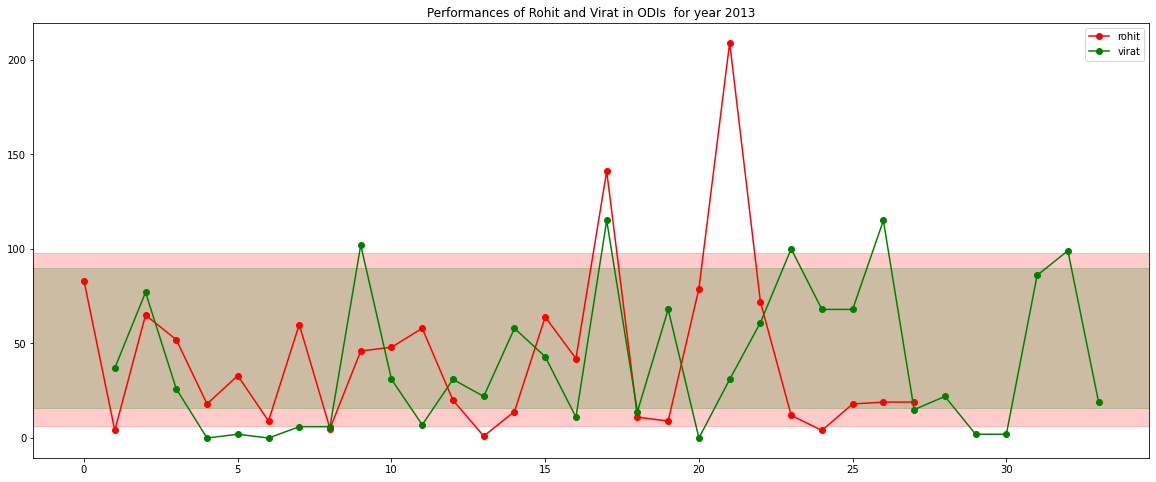

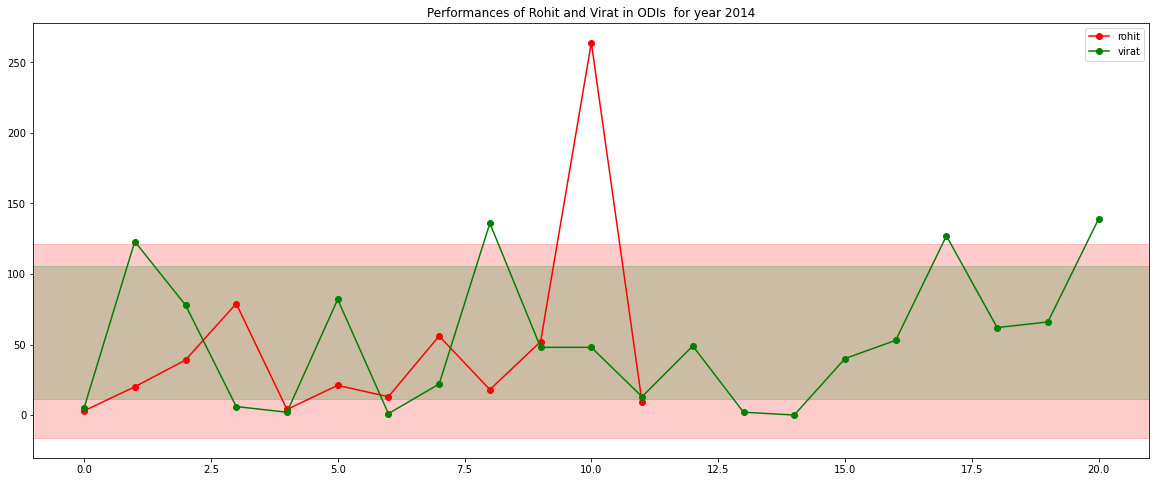

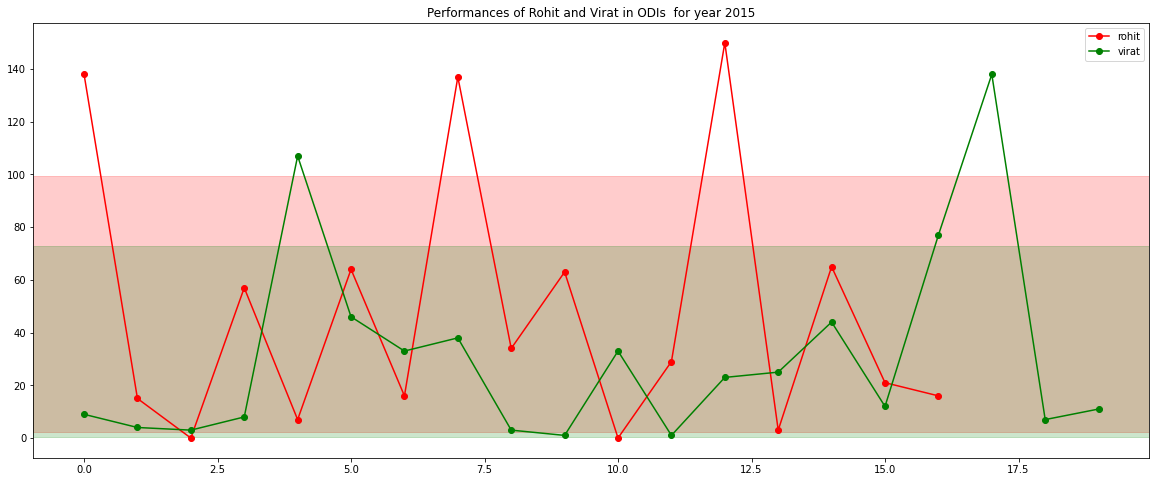

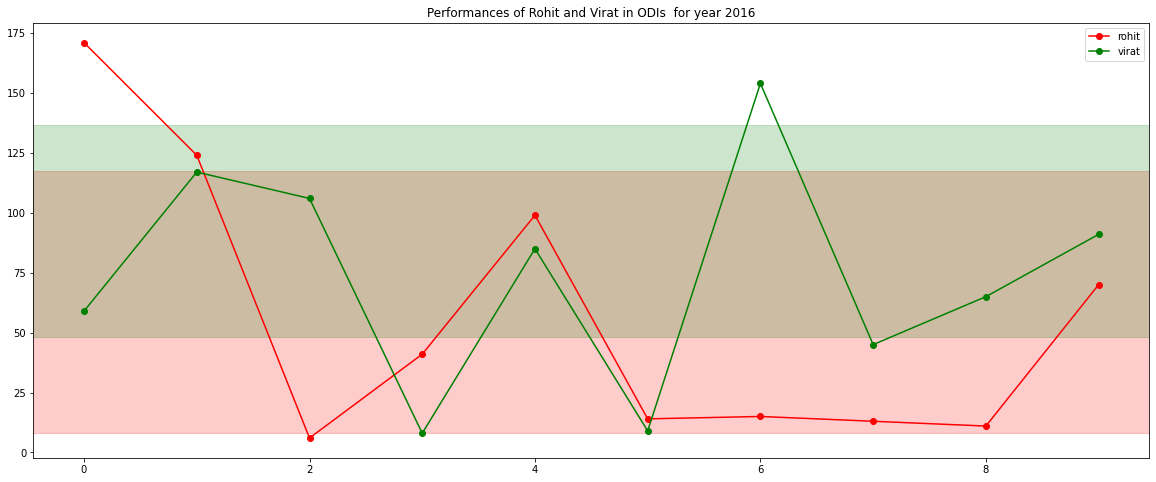

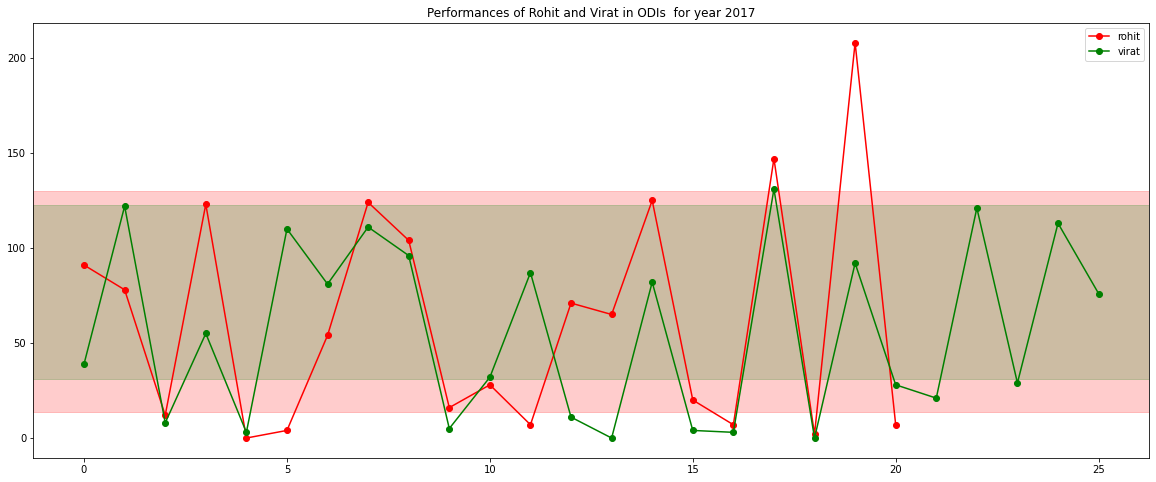

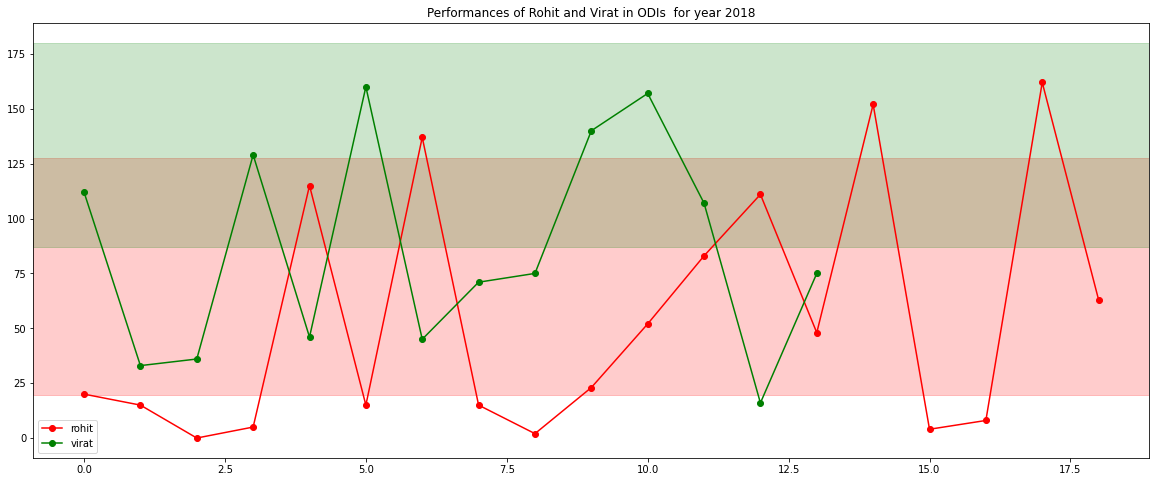

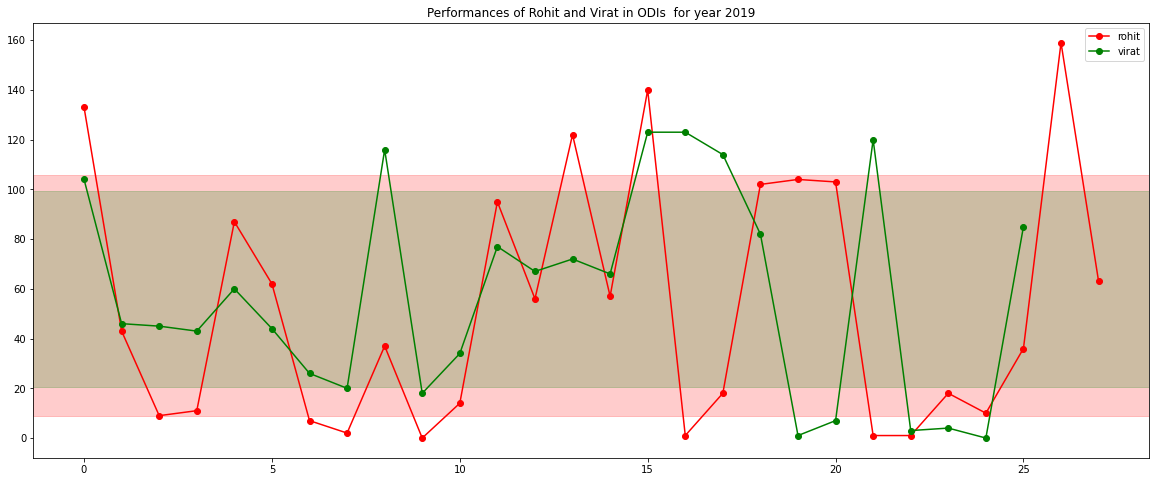

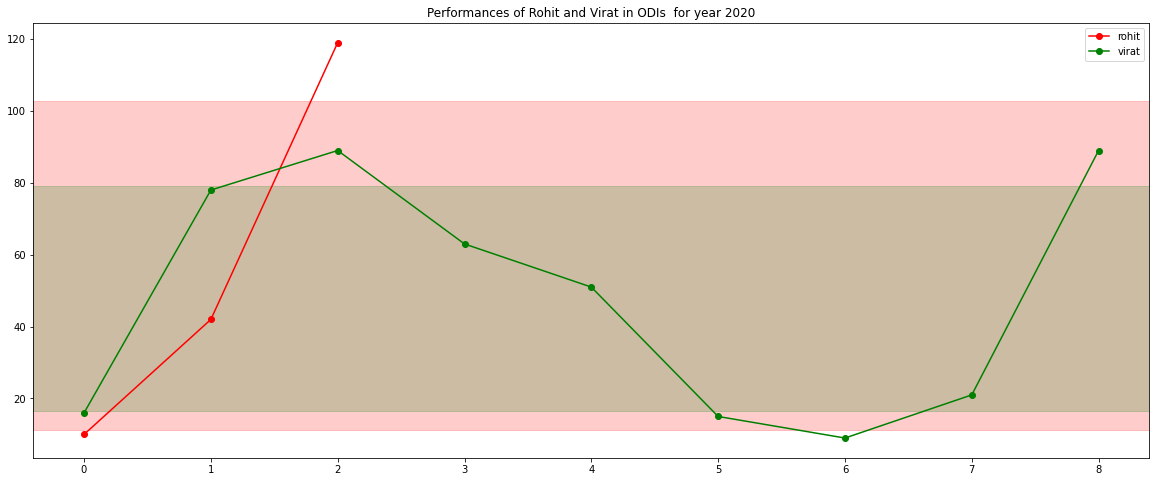

In [232]:
for year in rohit_df[rohit_df["Year"] > 2012]["Year"].unique():
    fig,ax = plt.subplots(1,1,figsize=(20,8))
    #px.line(data_frame=virat_df[virat_df['Date'].dt.year==2013].reset_index(drop=True),y='Runs',text='Runs')
    #px.line(data_frame=rohit_df[rohit_df['Date'].dt.year==2013].reset_index(drop=True),y='Runs',text='Runs')
    ax=rohit_df[rohit_df['Date'].dt.year==year]['Runs'].ffill().reset_index(drop=True).plot(kind='line',label='rohit',linestyle='-',marker='o',color='red')
    ax=virat_df[virat_df['Date'].dt.year==year]['Runs'].ffill().reset_index(drop=True).plot(kind='line',label='virat',linestyle='-',marker='o',color='green')
    rohit_range = rohit_stats_df[rohit_stats_df['year']==year]['range'].str.split(',')
    virat_range = virat_stats_df[virat_stats_df['year']==year]['range'].str.split(',')
    rohit_low = float(rohit_range.str[0])
    rohit_high = float(rohit_range.str[1])
    virat_low = float(virat_range.str[0])
    virat_high = float(virat_range.str[1])
    ax.axhspan(rohit_low,rohit_high,alpha=0.2,color='red')
    ax.axhspan(virat_low,virat_high,alpha=0.2,color='green')
    plt.legend()
    plt.title("Performances of Rohit and Virat in ODIs  for year "+str(year))
    plt.show()

### Let's use plotly for the above visualisation

In [375]:
import plotly.graph_objects as go
for year in rohit_df[rohit_df["Year"] > 2012]["Year"].unique():
    fig = go.Figure()
    rohit_year_df = rohit_df[rohit_df['Date'].dt.year==year][['Runs']].ffill().reset_index(drop=True)
    rohit_year_df.index=rohit_year_df.index+1
    virat_year_df = virat_df[virat_df['Date'].dt.year==year][['Runs']].ffill().reset_index(drop=True)
    virat_year_df.index=virat_year_df.index+1
    fig.add_trace(go.Line(x=rohit_year_df.index,
                          y=rohit_year_df['Runs'],
                          hovertext=rohit_year_df['Runs'],
                          hoverinfo='text',
                         name='Rohit',
                         marker=dict(color='blue')))
    fig.add_trace(go.Line(x=virat_year_df.index,
                          y=virat_year_df['Runs'],
                          hovertext=virat_year_df['Runs'],
                          hoverinfo='text',
                         name='Virat',
                         marker=dict(color='green')))
    rohit_range = rohit_stats_df[rohit_stats_df['year']==year]['range'].str.split(',')
    virat_range = virat_stats_df[virat_stats_df['year']==year]['range'].str.split(',')
    rohit_low = float(rohit_range.str[0])
    rohit_high = float(rohit_range.str[1])
    virat_low = float(virat_range.str[0])
    virat_high = float(virat_range.str[1])
    x_max = np.max([virat_year_df.shape[0],rohit_year_df.shape[0]])+1
    #hspan in plotly hack because add_h_rect not working currently.
    fig.add_trace(go.Scatter(x=[0,0,x_max,x_max],
                          y=[rohit_low,rohit_high,rohit_high,rohit_low],
                          fill='toself',
                          name='68% CI of Rohit Sharma',
                          #hoverinfo='skip',
                          marker={'color':'blue','opacity':0.2,'symbol':'circle'},
                          showlegend=False))
    fig.add_trace(go.Scatter(x=[0,0,x_max,x_max],
                          y=[virat_low,virat_high,
                             virat_high,virat_low],
                          fill='toself',
                          marker={'color':'green','opacity':0.2,'symbol':'circle'},
                          name='68% CI of Virat Runs',
                          #hoverinfo='skip',
                          showlegend=False))
    #ax.axhspan(rohit_low,rohit_high,alpha=0.2,color='red')
    #ax.axhspan(virat_low,virat_high,alpha=0.2,color='green')
    fig.update_layout(title='Performances of Virat and Rohit in '+str(year),
                        xaxis_title="Matches",
                        yaxis_title="Runs",
                        legend_title="Batsmen",)
    fig.show()
    #plt.title("Performances of Rohit and Virat in ODIs  for year "+str(year))
    #plt.show()

In [399]:
rohit_df.sort_values(by='Date',ascending=True,inplace=True)
rohit_df.reset_index(drop=True,inplace=True)
rohit_df

,Date,Versus,Ground,D/N*,How Dismissed,Runs,B/F,S/R,Aggr,Avg,S/R,Year,not_out,gap
0,2007-05-10,Australia,Rajiv Gandhi International Stadium,0.0,c B Lee b J R Hopes,1.0,4,25.00,9,4.50,69.23,2007,0,-47 days
1,2007-06-26,South Africa,Civil Service Cricket Club,0.0,b J H Kallis,8.0,9,88.89,8,8.00,88.89,2007,0,NaT
2,2007-11-18,Pakistan,Sawai Mansingh Stadium,1.0,c Yasir Hameed b Shoaib Malik,52.0,61,85.25,61,20.33,82.43,2007,0,192 days
3,2008-02-03,Australia,Sydney Cricket Ground,1.0,b J R Hopes,66.0,87,75.86,294,32.67,77.37,2008,0,-23 days
4,2008-02-07,Pakistan,National Stadium (Karachi),1.0,c Abdur Rauf b Iftikhar Anjum,58.0,71,81.69,446,27.88,73.60,2008,0,-142 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,2019-12-18,West Indies,Dr YS Rajasekhara Reddy Cricket Stadium,1.0,c †S D Hope b S S Cottrell,159.0,138,115.22,8881,49.07,88.81,2019,0,3 days
219,2019-12-22,West Indies,Barabati Stadium,1.0,c †S D Hope b J O Holder,63.0,63,100.00,8944,49.14,88.88,2019,0,4 days
220,2020-01-14,Australia,Wankhede Stadium,1.0,c D A Warner b M A Starc,10.0,15,66.67,8954,48.93,88.85,2020,0,23 days
221,2020-01-17,Australia,Saurashtra Cricket Association Stadium,1.0,lbw b A Zampa,42.0,44,95.45,8996,48.89,88.88,2020,0,3 days


In [406]:
rohit_df['gap'] = rohit_df['Date'].diff()
rohit_df[['Runs','gap']]

,Runs,gap
0,1.0,NaT
1,8.0,47 days
2,52.0,145 days
3,66.0,77 days
4,58.0,4 days
...,...,...
218,159.0,3 days
219,63.0,4 days
220,10.0,23 days
221,42.0,3 days


In [409]:
rohit_df['gap']=rohit_df['gap'].dt.days
rohit_df

,Date,Versus,Ground,D/N*,How Dismissed,Runs,B/F,S/R,Aggr,Avg,S/R,Year,not_out,gap
0,2007-05-10,Australia,Rajiv Gandhi International Stadium,0.0,c B Lee b J R Hopes,1.0,4,25.00,9,4.50,69.23,2007,0,NaN
1,2007-06-26,South Africa,Civil Service Cricket Club,0.0,b J H Kallis,8.0,9,88.89,8,8.00,88.89,2007,0,47.0
2,2007-11-18,Pakistan,Sawai Mansingh Stadium,1.0,c Yasir Hameed b Shoaib Malik,52.0,61,85.25,61,20.33,82.43,2007,0,145.0
3,2008-02-03,Australia,Sydney Cricket Ground,1.0,b J R Hopes,66.0,87,75.86,294,32.67,77.37,2008,0,77.0
4,2008-02-07,Pakistan,National Stadium (Karachi),1.0,c Abdur Rauf b Iftikhar Anjum,58.0,71,81.69,446,27.88,73.60,2008,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,2019-12-18,West Indies,Dr YS Rajasekhara Reddy Cricket Stadium,1.0,c †S D Hope b S S Cottrell,159.0,138,115.22,8881,49.07,88.81,2019,0,3.0
219,2019-12-22,West Indies,Barabati Stadium,1.0,c †S D Hope b J O Holder,63.0,63,100.00,8944,49.14,88.88,2019,0,4.0
220,2020-01-14,Australia,Wankhede Stadium,1.0,c D A Warner b M A Starc,10.0,15,66.67,8954,48.93,88.85,2020,0,23.0
221,2020-01-17,Australia,Saurashtra Cricket Association Stadium,1.0,lbw b A Zampa,42.0,44,95.45,8996,48.89,88.88,2020,0,3.0


In [410]:
rohit_df[rohit_df['Date'].dt.year > 2012 ][['Date','Runs','gap','Versus']]

,Date,Runs,gap,Versus
85,2013-01-08,64.0,9.0,Zimbabwe
86,2013-01-23,83.0,15.0,England
87,2013-01-27,4.0,4.0,England
88,2013-02-07,5.0,11.0,Sri Lanka
89,2013-02-11,209.0,4.0,Australia
90,2013-05-07,46.0,85.0,West Indies
91,2013-05-12,18.0,5.0,South Africa
92,2013-06-06,65.0,25.0,South Africa
93,2013-06-15,18.0,9.0,Pakistan
94,2013-06-20,33.0,5.0,Sri Lanka


In [415]:
px.scatter(data_frame=rohit_df[rohit_df['Date'].dt.year > 2012 ][['Date','Runs','gap','Versus']],y='gap',x='Runs',color='Versus')



In [457]:
avg__agt_teams_rohit = rohit_df[['Versus','Runs']].groupby(by='Versus').agg({"Runs":"mean","Versus":"count"}).sort_values(by='Runs',ascending=False).rename(columns={"Runs":"avg_score","Versus":"matches_count"}).reset_index()
avg__agt_teams_rohit

,Versus,avg_score,matches_count
0,Ireland,64.000000,1
1,United Arab Emirates,57.000000,1
2,Australia,55.200000,40
3,Bangladesh,50.769231,13
4,West Indies,49.129032,33
5,Pakistan,45.000000,16
6,Sri Lanka,37.000000,46
7,England,34.923077,13
8,Zimbabwe,34.571429,7
9,New Zealand,31.954545,24


In [467]:
avg__agt_teams_rohit[avg__agt_teams_rohit.matches_count > 5].style.background_gradient(cmap='Greens')

,Versus,avg_score,matches_count
2,Australia,55.200000,40
3,Bangladesh,50.769231,13
4,West Indies,49.129032,33
5,Pakistan,45.000000,16
6,Sri Lanka,37.000000,46
7,England,34.923077,13
8,Zimbabwe,34.571429,7
9,New Zealand,31.954545,24
10,South Africa,31.916667,25


- __Rohit Sharma__ is pretty good with Australia given that in 40 matches his average is more than 55. Which portrays his consistency with Australian bowlers.
- And his performance is not that great with South Africa when compared to others.
- He played most number of matches with Srilanka which are 46.

In [468]:
avg_agt_teams_virat = virat_df[['Versus','Runs']].groupby(by='Versus').agg({"Runs":"mean","Versus":"count"}).sort_values(by='Runs',ascending=False).rename(columns={"Runs":"avg_score","Versus":"matches_count"}).reset_index()
#avg__agt_teams_virat.columns={"Country","matches_count","avg_score"}
avg_agt_teams_virat[avg_agt_teams_virat.matches_count > 5].style.background_gradient(cmap="Greens")

,Versus,avg_score,matches_count
1,West Indies,58.815789,39
2,Bangladesh,56.666667,12
3,New Zealand,53.000000,26
4,South Africa,51.480000,27
5,Australia,50.804878,43
6,Sri Lanka,48.260870,47
7,Zimbabwe,42.166667,8
8,Pakistan,41.230769,13
9,England,39.806452,31


In [466]:
rohit_df[rohit_df['Runs'] >= 120 ]["Runs"].count(),virat_df[virat_df['Runs'] >120]['Runs'].count()

(20, 17)

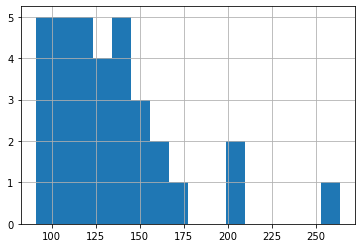

In [451]:
rohit_df[rohit_df['Runs'] > 90 ]['Runs'].hist(bins=16)

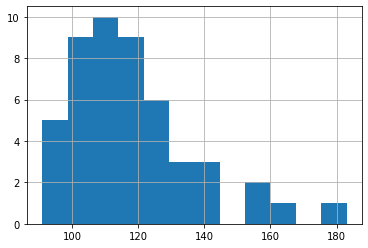

In [439]:
virat_df[virat_df['Runs'] > 90]['Runs'].hist(bins=12)

In [482]:
rohit_df[rohit_df.Ground=="Eden Gardens"]

,Date,Versus,Ground,D/N*,How Dismissed,Runs,B/F,S/R,Aggr,Avg,S/R,Year,not_out,gap
123,2014-11-13,Sri Lanka,Eden Gardens,1.0,c D P M D Jayawardene b K M D N Kulasekara,264.0,173,152.60,3743,38.19,81.03,2014,0,78.0
163,2017-09-21,Australia,Eden Gardens,1.0,c & b N M Coulter-Nile,7.0,14,50.00,5772,43.07,84.93,2017,0,4.0


In [480]:
rohit_df[rohit_df.Versus=="Australia"]

,Date,Versus,Ground,D/N*,How Dismissed,Runs,B/F,S/R,Aggr,Avg,S/R,Year,not_out,gap
0,2007-05-10,Australia,Rajiv Gandhi International Stadium,0.0,c B Lee b J R Hopes,1.0,4,25.00,9,4.50,69.23,2007,0,NaN
3,2008-02-03,Australia,Sydney Cricket Ground,1.0,b J R Hopes,66.0,87,75.86,294,32.67,77.37,2008,0,77.0
5,2008-02-17,Australia,Adelaide Oval,1.0,c †A C Gilchrist b J R Hopes,1.0,3,33.33,200,33.33,80.97,2008,0,10.0
7,2008-02-24,Australia,Sydney Cricket Ground,1.0,c †A C Gilchrist b N W Bracken,1.0,3,33.33,225,28.13,78.67,2008,0,5.0
9,2008-03-02,Australia,Brisbane Cricket Ground,1.0,c †A C Gilchrist b B Lee,29.0,43,67.44,90,22.50,76.92,2008,0,5.0
12,2008-04-03,Australia,Brisbane Cricket Ground,1.0,c A Symonds b M J Clarke,2.0,5,40.00,296,29.60,76.88,2008,0,1.0
23,2008-10-02,Australia,Melbourne Cricket Ground,1.0,not out,39.0,61,63.93,129,25.80,71.67,2008,1,34.0
72,2012-02-19,Australia,Brisbane Cricket Ground,1.0,c †M S Wade b B Lee,0.0,5,0.00,1889,33.14,78.77,2012,0,5.0
77,2012-05-02,Australia,Melbourne Cricket Ground,1.0,c †M S Wade b C J McKay,21.0,21,100.00,1831,34.55,79.33,2012,0,24.0
83,2012-12-02,Australia,Adelaide Oval,1.0,c M A Starc b R J Harris,33.0,41,80.49,1874,34.07,79.21,2012,0,122.0
